In [1]:
%pylab inline
import random 

Populating the interactive namespace from numpy and matplotlib


# Task-1 

In [2]:
def circle_top(x):
    return sqrt(1-x*x)

In [3]:
def ReimannIntegral(func,a,b,numInterval):
    '''Calculate the area under the curve func, between a and b'''
    h = (b-a)/numInterval
    xv = linspace(a,b,numInterval+1)
    fv = func(xv)
    area = h* np.sum ( fv[:-1]) # LEFT REIMANN SUM
    #area = h* np.sum( fv[1:])  # RIGHT REIMANN SUM
    return area

In [4]:
no_of_iter = 20     #change to change number of times the intergral is calculated

iv, av = [], []
for i in range(no_of_iter):
    iv.append(i+1)
    av.append( ReimannIntegral(circle_top,-1,1,i+1)*2/pi )

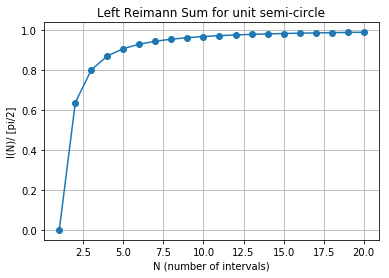

In [5]:
plot(iv,av,'o-')
title('Left Reimann Sum for unit semi-circle')
xlabel('N (number of intervals)')
ylabel('I(N)/ [pi/2]')
grid()

# Task-2

In [6]:
def derivitive(x):
    ans = (-1*x)/(sqrt(1-x*x))
    return ans

In [7]:
def AdaptiveGrid(func, der, a, b, numiter,threshold):
    dx = (b-a)/numiter
    x = linspace(a, b, numiter)
    
    area, dist_x = 0, 0
    count = 1
    val_init = x[1]
    
    for i in range(1, len(x)-1):
        val_final = x[i]
        if (abs( abs(der(val_init))-abs(der(val_final)) ) < threshold):
            dist_x += dx
            count += 1
            
        else :
            area += func((val_final + val_init)/count)*dist_x
            val_init = x[i+1]
            count = 1
    return area

In [8]:
AdaptiveGrid(circle_top,derivitive, -1, 1, 100, 1.1)/(pi/2)    # works well around threshold = 0.3

2.9708993605234486

# Task-3

In [9]:
def Naive_Monte_Carlo(a, b, numiter):
    succ, total = 0, 0
    for i in range(numiter):
        x, y = random.random(), random.random()
        if (sqrt(x*x + y*y) < 1) :
            succ += 1
        total += 1
    return succ/total

In [10]:
Naive_Monte_Carlo(0, 1, 50)

0.66

###  I(n) vs n

In [11]:
n = 50

iv, xn = [], []
iv = linspace(1, n, n)
for i in iv :
    xn.append(Naive_Monte_Carlo(0, 1, int(i))/(pi/4))
    #divided by pi/4(real value) so convergence should be around 1

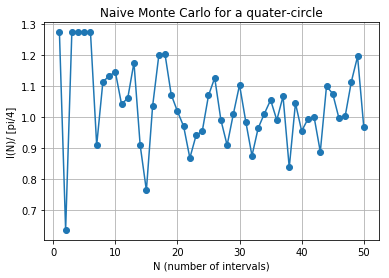

In [12]:
plot(iv,xn, "o-")
title('Naive Monte Carlo for a quater-circle')
xlabel('N (number of intervals)')
ylabel('I(N)/ [pi/4]')
grid()

# Task -4

In [13]:
def MonteCarloIntegration(func,a,b,numPoints):
    '''compute the area under the curve between a and b 
    with numPoints times evaluation of func'''
    
    I = 0.0
    for i in range(numPoints):
        x = np.random.uniform()*(b-a) + a
        I += func(x)
    
    return I*(b-a)/numPoints

In [14]:
def semicircle(x):
    return sqrt(1-x*x)

In [15]:
MonteCarloIntegration(semicircle,-1,1,20)/(pi/2)

1.0356893435379473

### I(n) vs n

In [16]:
n = 50

iv, xn = [], []
iv = linspace(1, n, n)
for i in iv :
    xn.append((MonteCarloIntegration(semicircle,-1,1,int(i))/(pi/2)))
    #divided by pi/2(real value) so convergence should be around 1

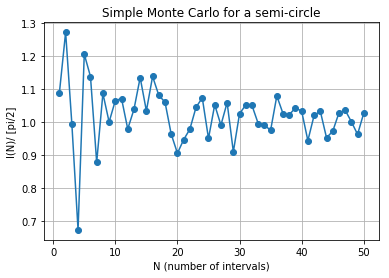

In [17]:
plot(iv,xn, "o-")
title('Simple Monte Carlo for a semi-circle')
xlabel('N (number of intervals)')
ylabel('I(N)/ [pi/2]')
grid()

# Task-5

In [18]:
def Imporatance_MonteCarloIntegration(func, a, b, numPoints):
    '''compute the area under the curve between a and b 
    with numPoints times evaluation of func'''
    
    I = 0.0
    for i in range(numPoints):
        x = normal() 
        if not(x<b and x>a) :
            continue
        I += func(x)/gaussain(x)
    
    return I/numPoints

In [19]:
def gaussain(x):
    ans = (1/sqrt(2*pi))*exp((-1*x*x)/2)
    return ans

In [20]:
Imporatance_MonteCarloIntegration(semicircle,-1,1, 50)/(pi/2)

0.8804437916199959

###  I(n) vs n

In [21]:
n = 50

iv, xv = [], []
iv = linspace(1, n, n)
for i in iv :
    xv.append((Imporatance_MonteCarloIntegration(semicircle,-1,1,int(i))/(pi/2)))
    #divided by pi/2(real value) so convergence should be around 1

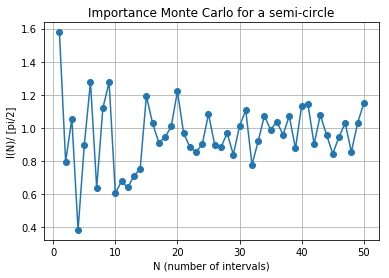

In [22]:
plot(iv,xv, "o-")
title('Importance Monte Carlo for a semi-circle')
xlabel('N (number of intervals)')
ylabel('I(N)/ [pi/2]')
grid()